### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

--答案写这里--

自变量是： 文字的打印颜色是否和文字意思描述一致  

因变量是：被试者正确把文字的打印颜色说出来所需要的时间变化



(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

--答案写这里-- 



μ0: 字体的文字意思和其打印的颜色一致时的用时的总体均值

μ1: 字体的文字意思和其打印的颜色不一致时的用时的总体均值

x_bar0 :字体的文字意思和其打印的颜色一致时的用时的样本均值

x_bar1 :字体的文字意思和其打印的颜色不一致时的用时的样本均值

s0: 字体的文字意思和其打印的颜色一致时的用时的样本标准差

s1: 字体的文字意思和其打印的颜色不一致时的用时的样本标准差

v0: μ0/标准差σ0 字体的文字意思和其打印的颜色一致时的用时的总体变异系数

v1 μ1/标准差σ1  字体的文字意思和其打印的颜色不一致时的用时的总体变异系数

假设集:

原假设H0 :字体的文字意思和其打印的颜色是否一致 不会 对被试者正确念出他们造成影响。即μ0=μ1

备择假设Ha : 字体的文字意思和其打印颜色的是否一致 会 对被试者正确念出他们造成影响。即μ0≠μ1

t检验使用的假设前提：

1）因为目前只有两个样本，然后一般总体的分布应该还是符合正态分布的，所以就假设总体也是符合正态分布。（假设总体的情况）

2）因为实验有两个样本的比较，所以应该是双样本检验。

3）然后被试者分别对两种实验进行测试并且记录所用时间，每个被试者的状态水平是不同的，这也会间接造成每个人的两次实验的水平不一样，所以前次一致的实验和后次不一致的实验收集到的数据是属于相关的样本，一致或者不一致的样本各个都是 24 行，小于30行，所以不适用正态分布，比较适用于T分布。然后因为是相关样本，所以比较适合使用相关样本的T检验，即使用双样本检验中的配对样本T检验。   （受试者独立性分析和t检验使用的假设）





现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

--答案写这里--

如下面方框可以看到包括 均值，和方法的集中性趋势测量，通过describe()查看，和变异值测量v= μ/σ



In [1]:
# 在这里执行你的分析，先导入需要用的一些包
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df_data = pd.read_csv("stroopdata.csv")  

## 下面是均值，方差和变异系数的输出结果

In [2]:
df_data.describe()  #查看数据集的长度

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
data_describe = df_data.describe()    #使用describe函数输出计算结果
data_describe.loc['变异系数测量'] = data_describe.loc['std']/data_describe.loc['mean']    #增加测量变异系数
print("均值，方差和变异系数的输出结果")
print("x_bar0="+str(data_describe.loc['mean'][0])+"  ")  
print("x_bar1="+str(data_describe.loc['mean'][1])+"  ")   
print("s0="+str(data_describe.loc['std'][0]))
print("s1="+str(data_describe.loc['std'][1]))   
print("v0="+str(data_describe.loc['变异系数测量'][0]))
print("v1="+str(data_describe.loc['变异系数测量'][1]))   

print()
# print(data_describe)

均值，方差和变异系数的输出结果
x_bar0=14.051125  
x_bar1=22.0159166667  
s0=3.55935795765
s1=4.79705712247
v0=0.25331480274
v1=0.217890410611



In [4]:
df_data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

--答案写这里--

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9324dbac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff9304527b8>]], dtype=object)

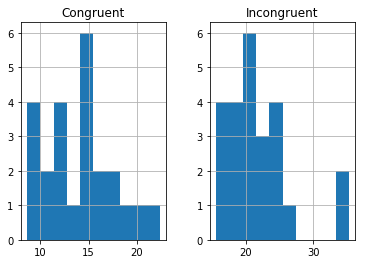

In [5]:
# 在这里创建可视化图表
df_data.hist()    #绘制直方图
# plt.show() #整体数据集的可视化概略，说明人对词义的发音与打印颜色应该是有影响的。

### 分析 ：两样本的直方图可以看出，样本因为容量比较小（<30) 所以本身不太适合使用正态分布，所以比较适合使用t分布

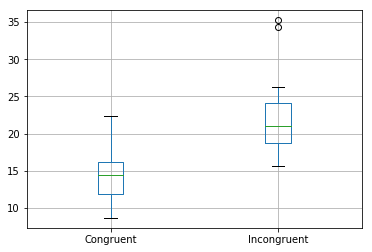

In [6]:
# 挥之箱线图
df_data.boxplot()

### 分析 ：两样本的箱型图也可以看出，两种的均值是不一样的，不一致的时间均值比较大，不一致的整体也比一致的时间要长一点，所以也基本符合我们的备择假设猜想，于是我们计算证明

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

--答案写这里--

In [7]:
print("数据总体有："+str(len( df_data ))+"个")

数据总体有：24个


### 在这里执行统计检验,各关键统计量分析如下：
###  1、因为备择假设是μ0≠μ1 ，所以使用双边检测
###  2、因为统计的样本数量为24<30 属于小样本，所以样本使用T分布。并且根据需要选用了两组样本的配对T检验
###  3、这儿设置置信水平为95%，显著性水平设置为5% ；自由度v=观测值-1（即v=24-1=23）；
###  4、t 临界值: 因为使用双边检验，所以每边为0.025，又因为自由度v=23，所以查t分布表可以得到临界值t=±2.069


In [8]:
# 使用配对样本T检验的方法来计算出p值
from  scipy.stats import ttest_rel     #导入scipy 中用于计算配对样本t检验的方法

x = df_data.Congruent
y = df_data.Incongruent
print(ttest_rel(x, y))      #代入两列样本集合计算输出得到的p值

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


In [9]:
# 又因为检测所得P值 小于 置信水平α，所以结果落入了拒绝域，如下
4.1030005857111781e-08<0.05

True

--答案写这里--

### 决策：由独立t检验的结果p值来看为 p < α ，所以结论应该是在检验水平为5%时，可以拒绝原假设H0，接收备择假设：字体的文字意思和其打印颜色的是否一致 会 对被试者正确念出他们时间长短造成影响。μ0≠μ1

### 参考/引用

> [1] https://blog.csdn.net/qq_38214903/article/details/82965090  引用了关于 独立样本t检验的 scipy中  ttest_ind的操作方法


> [2] https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/tests-of-means/how-are-dependent-and-independent-samples-different/  样本相关性知识，来源于这儿

> [3] https://blog.csdn.net/qtlyx/article/details/52852034dataFrame 如何绘制箱型图的操作方法，参考自此博文

> [4] https://blog.csdn.net/qq_38214903/article/details/82965697 Python统计分析-配对样本t检验

> [5] https://github.com/ShiChJ/DAND-Basic-Materials/blob/master/P1/t-table.jpg  T值表参考这儿
